In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download torchreid

In [2]:
!git clone https://github.com/KaiyangZhou/deep-person-reid.git
!cd deep-person-reid
!pwd

Cloning into 'deep-person-reid'...
remote: Enumerating objects: 9876, done.
remote: Counting objects: 100% (766/766), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 9876 (delta 693), reused 665 (delta 665), pack-reused 9110 (from 1)
Receiving objects: 100% (9876/9876), 9.54 MiB | 26.68 MiB/s, done.
Resolving deltas: 100% (7313/7313), done.
/content


In [3]:
import os
os.chdir("deep-person-reid")
print(os.getcwd())

/content/deep-person-reid


In [4]:
!pip install -r requirements.txt
!python setup.py develop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 3.8 MB/s eta 0:00:00
/content/deep-person-reid/torchreid/metrics/rank.py:11: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  warnings.warn(
2025-12-09 16:43:06.883006: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765298586.909836     584 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN

# Download Pre-trained OsNet Models

In [5]:
import torchreid
from torchreid.utils import FeatureExtractor
import torch
import numpy as np

# osnet_x1_0
extractor_x1 = FeatureExtractor(
    model_name='osnet_x1_0',
    model_path='',
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

# #osnet_ibn_x1_0
extractor_ibn = FeatureExtractor(
    model_name='osnet_ibn_x1_0',
    model_path='',
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

# osnet_ain_x1_0
extractor_ain = FeatureExtractor(
    model_name='osnet_ain_x1_0',
    model_path='',
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

Downloading...
From: https://drive.google.com/uc?id=1LaG1EJpHrxdAxKnSCJ_i0u-nbxSAeiFY
To: /root/.cache/torch/checkpoints/osnet_x1_0_imagenet.pth
100%|██████████| 10.9M/10.9M [00:00<00:00, 27.8MB/s]


Successfully loaded imagenet pretrained weights from "/root/.cache/torch/checkpoints/osnet_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Model: osnet_x1_0
- params: 2,193,616
- flops: 978,878,352


Downloading...
From: https://drive.google.com/uc?id=1sr90V6irlYYDd4_4ISU2iruoRG8J__6l
To: /root/.cache/torch/checkpoints/osnet_ibn_x1_0_imagenet.pth
100%|██████████| 10.9M/10.9M [00:00<00:00, 19.6MB/s]


Successfully loaded imagenet pretrained weights from "/root/.cache/torch/checkpoints/osnet_ibn_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Model: osnet_ibn_x1_0
- params: 2,194,640
- flops: 978,878,352


Downloading...
From: https://drive.google.com/uc?id=1-CaioD9NaqbHK_kzSMW8VE4_3KcsRjEo
To: /root/.cache/torch/checkpoints/osnet_ain_x1_0_imagenet.pth
100%|██████████| 10.9M/10.9M [00:00<00:00, 19.4MB/s]


Successfully loaded imagenet pretrained weights from "/root/.cache/torch/checkpoints/osnet_ain_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Model: osnet_ain_x1_0
- params: 2,193,616
- flops: 978,878,352


# Resize Datasets

In [6]:
import os
os.chdir("/content")
print(os.getcwd())

/content


In [7]:
!pip install rarfile

In [8]:
import os
import rarfile
from PIL import Image

rar_path = "/content/drive/MyDrive/Colab Notebooks/torchreid_project/images.rar"
extract_dir = "extracted_images"
resized_dir = "resized_dataset"

def resize_image(file_path):
  try:
    img = Image.open(file_path).convert("RGB")
    img = img.resize((128, 256))
    return img
  except Exception as e:
    print(f"Error processing {file_path}: {e}")
    return None

def save_resized_images(rar_path,extract_dir,resized_dir):

  os.makedirs(extract_dir, exist_ok=True)
  os.makedirs(resized_dir, exist_ok=True)

  with rarfile.RarFile(rar_path) as rf:
      rf.extractall(path=extract_dir)

  extract_dir = "extracted_images/images"

  for filename in os.listdir(extract_dir):
      file_path = os.path.join(extract_dir, filename)

      if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".webp", ".tiff")):
          try:
              img = Image.open(file_path).convert("RGB")
              img = img.resize((128, 256))
              img = resize_image(file_path)

              base_filename = os.path.basename(filename)
              # base_filename = os.path.basename(filename)[0]
              save_path = os.path.join(resized_dir, base_filename)
              img.save(save_path)

          except Exception as e:
              print(f"Error processing {filename}: {e}")

  print("Resizing complete.")
save_resized_images(rar_path,extract_dir,resized_dir)

Resizing complete.


# Similarity of a query and test image

In [9]:
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.Resize((256, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def load_image(path):
    img = Image.open(path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)
    return img_tensor

def cosine_similarity(f1, f2):
    f1 = np.array(f1)
    f2 = np.array(f2)
    f1 = f1 / np.linalg.norm(f1) # normalize
    f2 = f2 / np.linalg.norm(f2) # normalize
    return np.dot(f1, f2)

def show_images(query_image, test_image):
  query_img = Image.open(query_image).convert('RGB')
  test_img = Image.open(test_image).convert('RGB')

  fig, axs = plt.subplots(1, 2, figsize=(10, 5))

  axs[0].imshow(query_img)
  axs[0].axis('off')
  axs[0].set_title('query image')

  axs[1].imshow(test_img)
  axs[1].axis('off')
  axs[1].set_title('test image')

  plt.tight_layout()
  plt.show()

def calculate_cosine_simlarity_using_embedding(extractor,query_image,test_image):

  query_embedding = extractor(load_image(query_image))[0]
  test_embedding = extractor(load_image(test_image))[0]

  print("shape of embedding ",query_embedding.shape)

  cosine_sim = cosine_similarity(query_embedding, test_embedding)
  return cosine_sim



shape of embedding  torch.Size([512])
shape of embedding  torch.Size([512])
shape of embedding  torch.Size([512])
cosine similarity using osnet_x1_0      : 0.5219898223876953
cosine similarity using osnet_ain_x1_0  : 0.4956764876842499
cosine similarity using osnet_ibn_x1_0  : 0.48523348569869995


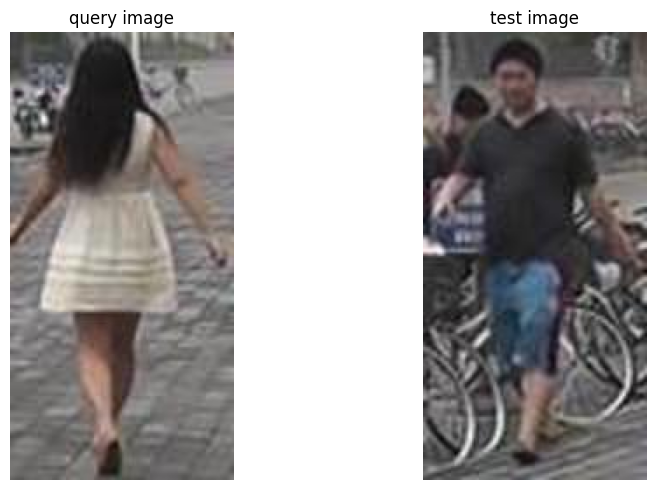

In [10]:
query_image = "resized_dataset/sample11.jpg"
test_image = "resized_dataset/sample21.jpg"

# query_image = "/content/query.jpg"
# test_image = "/content/check1.jpeg"

cosine_sim1 = calculate_cosine_simlarity_using_embedding(extractor_x1,query_image,test_image)
cosine_sim2 = calculate_cosine_simlarity_using_embedding(extractor_ain,query_image,test_image)
cosine_sim3 = calculate_cosine_simlarity_using_embedding(extractor_ibn,query_image,test_image)

print(f"cosine similarity using osnet_x1_0      : {cosine_sim1}")
print(f"cosine similarity using osnet_ain_x1_0  : {cosine_sim2}")
print(f"cosine similarity using osnet_ibn_x1_0  : {cosine_sim3}")

show_images(query_image, test_image)

shape of embedding  torch.Size([512])
shape of embedding  torch.Size([512])
shape of embedding  torch.Size([512])
cosine similarity using osnet_x1_0      : 0.5219898223876953
cosine similarity using osnet_ain_x1_0  : 0.4956764876842499
cosine similarity using osnet_ibn_x1_0  : 0.48523348569869995


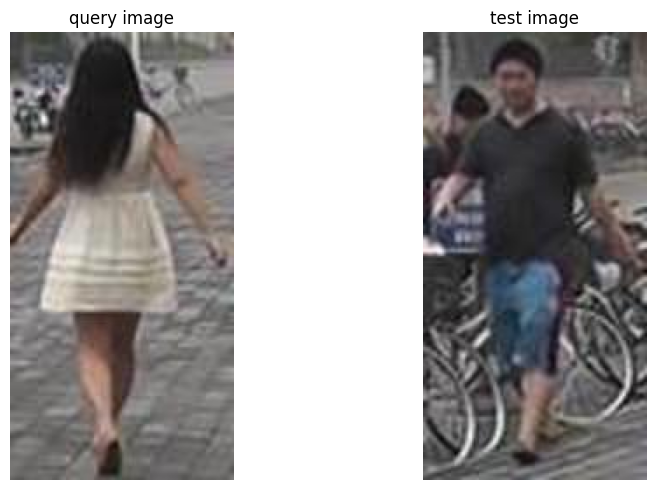

In [11]:
query_image = "resized_dataset/sample11.jpg"
test_image = "resized_dataset/sample21.jpg"

# query_image = "/content/query.jpg"
# test_image = "/content/amrit_check.jpeg"

cosine_sim1 = calculate_cosine_simlarity_using_embedding(extractor_x1,query_image,test_image)
cosine_sim2 = calculate_cosine_simlarity_using_embedding(extractor_ain,query_image,test_image)
cosine_sim3 = calculate_cosine_simlarity_using_embedding(extractor_ibn,query_image,test_image)

print(f"cosine similarity using osnet_x1_0      : {cosine_sim1}")
print(f"cosine similarity using osnet_ain_x1_0  : {cosine_sim2}")
print(f"cosine similarity using osnet_ibn_x1_0  : {cosine_sim3}")

show_images(query_image, test_image)

shape of embedding  torch.Size([512])
shape of embedding  torch.Size([512])
shape of embedding  torch.Size([512])
cosine similarity using osnet_x1_0      : 0.5219898223876953
cosine similarity using osnet_ain_x1_0  : 0.4956764876842499
cosine similarity using osnet_ibn_x1_0  : 0.48523348569869995


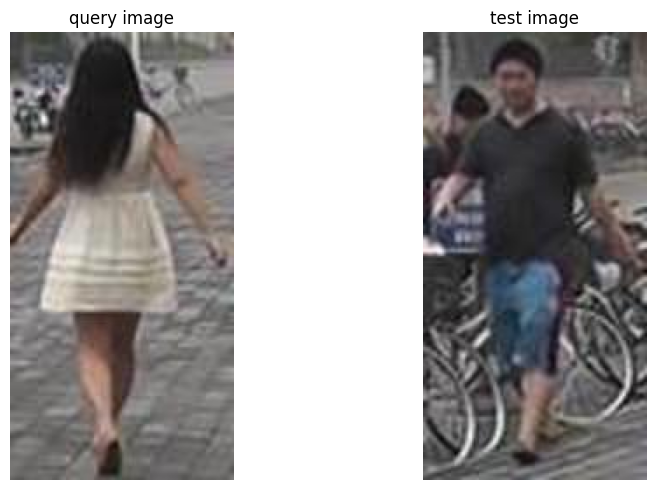

In [12]:
query_image = "resized_dataset/sample11.jpg"
test_image = "resized_dataset/sample21.jpg"

# query_image = "/content/query.jpg"
# test_image = "/content/sagar_check.jpeg"

cosine_sim1 = calculate_cosine_simlarity_using_embedding(extractor_x1,query_image,test_image)
cosine_sim2 = calculate_cosine_simlarity_using_embedding(extractor_ain,query_image,test_image)
cosine_sim3 = calculate_cosine_simlarity_using_embedding(extractor_ibn,query_image,test_image)

print(f"cosine similarity using osnet_x1_0      : {cosine_sim1}")
print(f"cosine similarity using osnet_ain_x1_0  : {cosine_sim2}")
print(f"cosine similarity using osnet_ibn_x1_0  : {cosine_sim3}")

show_images(query_image, test_image)

shape of embedding  torch.Size([512])
shape of embedding  torch.Size([512])
shape of embedding  torch.Size([512])
cosine similarity using osnet_x1_0      : 0.5219898223876953
cosine similarity using osnet_ain_x1_0  : 0.4956764876842499
cosine similarity using osnet_ibn_x1_0  : 0.48523348569869995


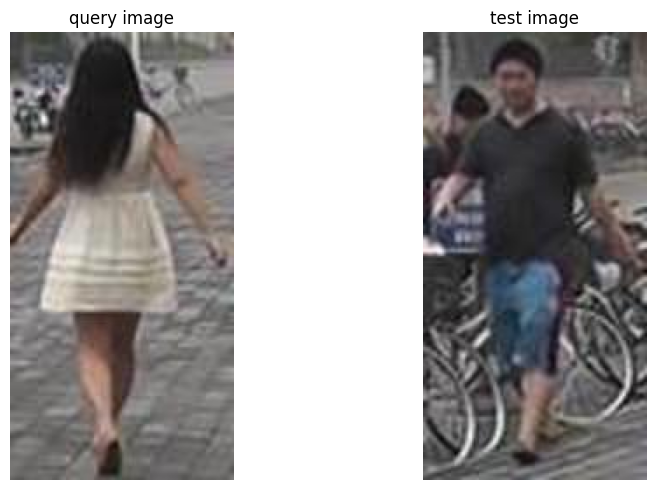

In [13]:
query_image = "resized_dataset/sample11.jpg"
test_image = "resized_dataset/sample21.jpg"

# query_image = "/content/check1.jpeg"
# test_image = "/content/amrit_check.jpeg"

cosine_sim1 = calculate_cosine_simlarity_using_embedding(extractor_x1,query_image,test_image)
cosine_sim2 = calculate_cosine_simlarity_using_embedding(extractor_ain,query_image,test_image)
cosine_sim3 = calculate_cosine_simlarity_using_embedding(extractor_ibn,query_image,test_image)

print(f"cosine similarity using osnet_x1_0      : {cosine_sim1}")
print(f"cosine similarity using osnet_ain_x1_0  : {cosine_sim2}")
print(f"cosine similarity using osnet_ibn_x1_0  : {cosine_sim3}")

show_images(query_image, test_image)

shape of embedding  torch.Size([512])
shape of embedding  torch.Size([512])
shape of embedding  torch.Size([512])
cosine similarity using osnet_x1_0      : 0.5219898223876953
cosine similarity using osnet_ain_x1_0  : 0.4956764876842499
cosine similarity using osnet_ibn_x1_0  : 0.48523348569869995


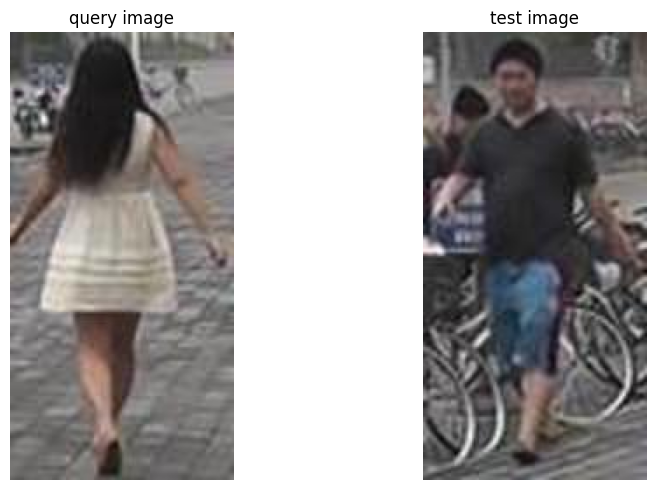

In [14]:
query_image = "resized_dataset/sample11.jpg"
test_image = "resized_dataset/sample21.jpg"

# query_image = "/content/check1.jpeg"
# test_image = "/content/sagar_check.jpeg"

cosine_sim1 = calculate_cosine_simlarity_using_embedding(extractor_x1,query_image,test_image)
cosine_sim2 = calculate_cosine_simlarity_using_embedding(extractor_ain,query_image,test_image)
cosine_sim3 = calculate_cosine_simlarity_using_embedding(extractor_ibn,query_image,test_image)

print(f"cosine similarity using osnet_x1_0      : {cosine_sim1}")
print(f"cosine similarity using osnet_ain_x1_0  : {cosine_sim2}")
print(f"cosine similarity using osnet_ibn_x1_0  : {cosine_sim3}")

show_images(query_image, test_image)

# Similarity of multiple images

## Calculate Embeddings of all images

In [15]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((256, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def load_image(path):
    img = Image.open(path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)
    return img_tensor

def calculate_embeddings_all_images(extractor,resized_dir):
    embeddings_dict = {}

    for filename in os.listdir(resized_dir):
        if filename.lower().endswith(".jpg"):
            file_path = os.path.join(resized_dir, filename)
            try:
                img = load_image(file_path)
                embedding = extractor(img)[0]
                embeddings_dict[filename] = embedding
            except Exception as e:
                print(f"Failed to process {filename}: {e}")

    sorted_dict = dict(sorted(embeddings_dict.items(), key=lambda item: item[0].lower()))
    print("sorted_dict ",sorted_dict['sample11.jpg'].shape)
    return sorted_dict

extractor = extractor_x1
# extractor = extractor_ain
# extractor = extractor_ibn
embeddings_dict = calculate_embeddings_all_images(extractor, resized_dir)

sorted_dict  torch.Size([512])


## Calculate cosine sim of each images with all

In [16]:
import torch
import numpy as np

def compute_cosine_similarity_with_all_images(embeddings_dict):
    filenames = list(embeddings_dict.keys())
    embeddings = torch.stack([embeddings_dict[f] for f in filenames])  # shape: (N, D (512))

    embeddings_norm = embeddings / embeddings.norm(dim=1, keepdim=True) # nrmalize embeddings to unit vectors
    similarity_matrix = torch.matmul(embeddings_norm, embeddings_norm.T).cpu().numpy()

    return filenames, similarity_matrix

filenames,similarity_matrix = compute_cosine_similarity_with_all_images(embeddings_dict)
filenames, similarity_matrix

(['sample11.jpg',
  'sample12.jpg',
  'sample13.jpg',
  'sample14.jpg',
  'sample15.jpg',
  'sample21.jpg',
  'sample22.jpg',
  'sample23.jpg',
  'sample24.jpg',
  'sample25.jpg'],
 array([[1.        , 0.6993691 , 0.77596474, 0.74691296, 0.7132275 ,
         0.5219898 , 0.648638  , 0.6384787 , 0.6135367 , 0.55128896],
        [0.6993691 , 1.        , 0.75715214, 0.73086554, 0.7378501 ,
         0.56451136, 0.62140286, 0.63764113, 0.62080085, 0.5534154 ],
        [0.77596474, 0.75715214, 1.0000002 , 0.6876123 , 0.7847645 ,
         0.5731604 , 0.70781446, 0.62114644, 0.6533349 , 0.5936799 ],
        [0.74691296, 0.73086554, 0.6876123 , 1.        , 0.6978104 ,
         0.57140553, 0.6158837 , 0.65684056, 0.53165734, 0.6386732 ],
        [0.7132275 , 0.7378501 , 0.7847645 , 0.6978104 , 0.99999994,
         0.5253334 , 0.706901  , 0.6405932 , 0.6269135 , 0.5827664 ],
        [0.5219898 , 0.56451136, 0.5731604 , 0.57140553, 0.5253334 ,
         1.        , 0.49779552, 0.5519932 , 0.55310255

## Plot Cosine sim in co-relation map

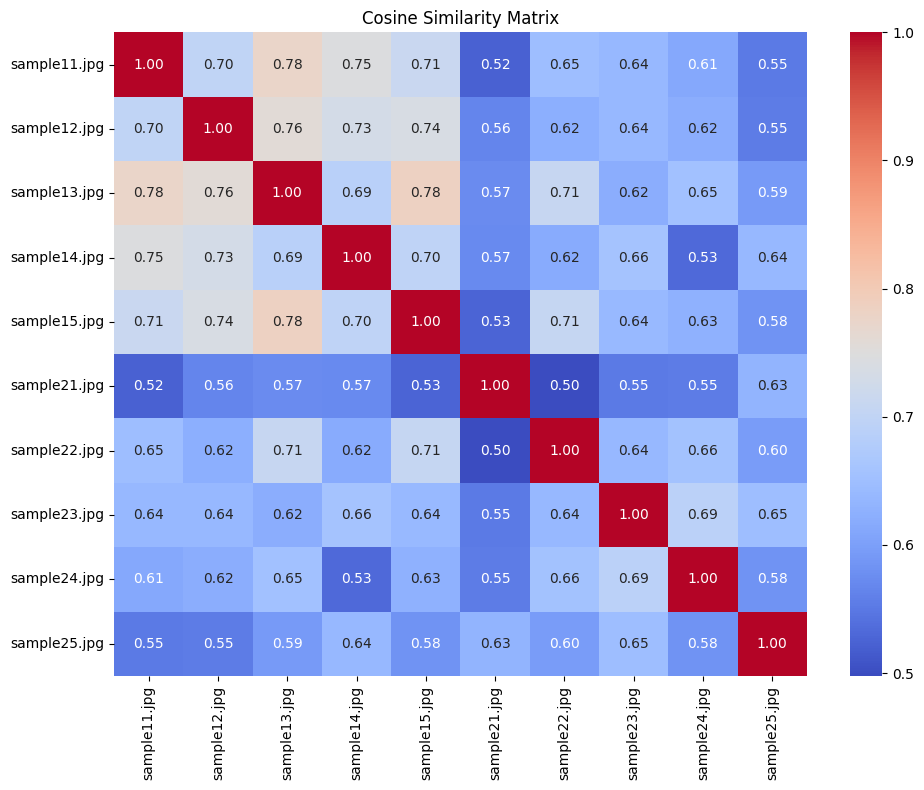

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity_matrix(filenames, similarity_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, xticklabels=filenames, yticklabels=filenames, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title("Cosine Similarity Matrix")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_similarity_matrix(filenames, similarity_matrix)

## Plot Cosine Sim with images

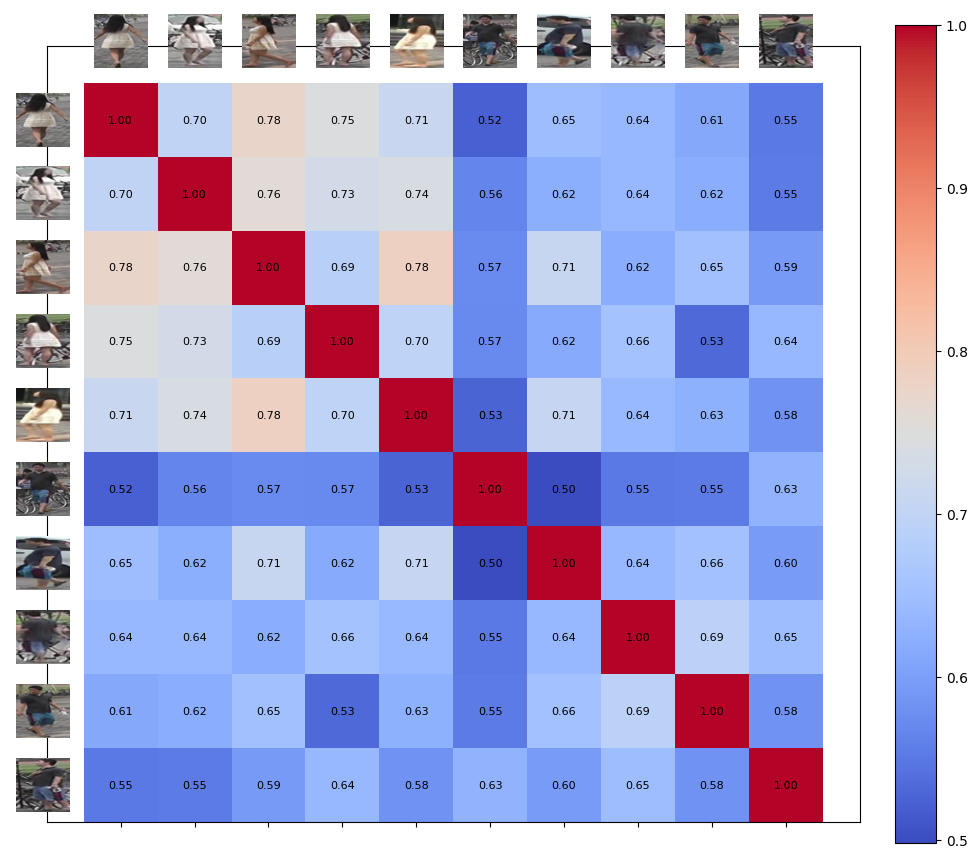

In [18]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

def plot_similarity_with_images(resized_dir, filenames, similarity_matrix):
    fig, ax = plt.subplots(figsize=(10, 10))

    plt.subplots_adjust(left=0.5, bottom=0.5)

    cax = ax.matshow(similarity_matrix, cmap='coolwarm')

    ax.set_xticks(range(len(filenames)))
    ax.set_yticks(range(len(filenames)))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    for (i, j), val in np.ndenumerate(similarity_matrix):
        ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black', fontsize=8)

    for i, fname in enumerate(filenames):
        image_path = os.path.join(resized_dir, fname)
        img = Image.open(image_path).convert("RGB").resize((64, 64))
        imagebox = OffsetImage(img, zoom=0.6)
        ab = AnnotationBbox(imagebox, (i, -0.7), frameon=False, box_alignment=(0.5, 0))
        ax.add_artist(ab)

    for i, fname in enumerate(filenames):
        image_path = os.path.join(resized_dir, fname)
        img = Image.open(image_path).convert("RGB").resize((64, 64))
        imagebox = OffsetImage(img, zoom=0.6)
        ab = AnnotationBbox(imagebox, (-0.7, i), frameon=False, box_alignment=(1, 0.5))
        ax.add_artist(ab)

    ax.set_xlim(-1, len(filenames))
    ax.set_ylim(len(filenames)-0.5, -1)

    fig.colorbar(cax, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

resized_dir = "resized_dataset"
plot_similarity_with_images(resized_dir, filenames, similarity_matrix)